# CS 441 Final Project - Disaster Tweets

## 1. Import

In [47]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [36]:
train_df = pd.read_csv("train.csv")

# Split the dataset (80% train, 20% validation)
train_data, val_data = train_test_split(train_df, test_size = 0.2, random_state = 441)

print("Training set:", train_data.shape)
print("Validation set:", val_data.shape)

print("Example:\n", train_df.iloc[32])

Training set: (6090, 5)
Validation set: (1523, 5)
Example:
 id                                                         49
keyword                                                ablaze
location                        Est. September 2012 - Bristol
text        We always try to bring the heavy. #metal #RT h...
target                                                      0
Name: 32, dtype: object


# 2. Preprocess

In [37]:
# Preprocess text, remove part of speech, stopwords, and http links
# https://stackoverflow.com/questions/17390326/getting-rid-of-stop-words-and-document-tokenization-using-nltk
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(tokens)

train_data["clean_text"] = train_data["text"].apply(preprocess_text)
val_data["clean_text"] = val_data["text"].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(max_features = 5000)

X_train = tfidf_vectorizer.fit_transform(train_data["clean_text"])
y_train = train_data["target"]

X_val = tfidf_vectorizer.transform(val_data["clean_text"])
y_val = val_data["target"]

print("Original:", train_data.iloc[1]["text"])
print("Processed:", train_data.iloc[1]["clean_text"])

Original: British diver Neil Anthony Fears found dead by the wreck of a steamship - Daily Mail http://t.co/QP3GVvfoFq
Processed: british diver neil anthony fear found dead wreck steamship daily mail http


## 3. KNN

In [40]:
k_values = [1, 3, 5, 7, 9, 11]

accuracy_scores = []
f1_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

result_df = pd.DataFrame({
    'K': [K for K in k_values],
    'Accuracy': accuracy_scores,
    'F1-score': f1_scores
})
print(result_df)

    K  Accuracy  F1-score
0   1  0.695995  0.532795
1   3  0.670387  0.439732
2   5  0.647406  0.356886
3   7  0.640184  0.330073
4   9  0.633618  0.304239
5  11  0.625739  0.278481


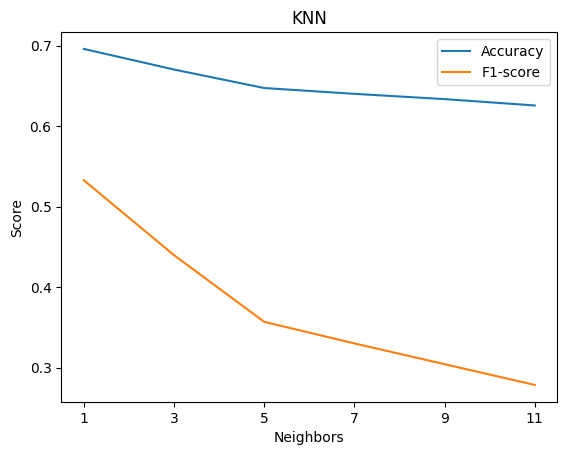

In [70]:
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, f1_scores, label='F1-score')
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('KNN')
plt.xticks(k_values)
plt.legend()
plt.show()

## 4. Logistic Regression

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]
penalty_values = ['l1', 'l2']

hyperparam_values = []
accuracy_scores = []
f1_scores = []


for C in C_values:
    for penalty in penalty_values:
        lr_clf = LogisticRegression(C = C, penalty = penalty, solver = 'liblinear', random_state = 42)
        lr_clf.fit(X_train, y_train)

        y_pred = lr_clf.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        hyperparam_values.append((C, penalty))
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

results_df = pd.DataFrame({
    'C': [param[0] for param in hyperparam_values],
    'Penalty': [param[1] for param in hyperparam_values],
    'Accuracy': accuracy_scores,
    'F1-score': f1_scores
})

print(results_df)

        C Penalty  Accuracy  F1-score
0    0.01      l1  0.556796  0.000000
1    0.01      l2  0.556796  0.000000
2    0.10      l1  0.582403  0.260465
3    0.10      l2  0.730138  0.587763
4    1.00      l1  0.766907  0.705394
5    1.00      l2  0.800394  0.755233
6   10.00      l1  0.762968  0.721236
7   10.00      l2  0.776756  0.736434
8  100.00      l1  0.746553  0.706240
9  100.00      l2  0.757715  0.718964


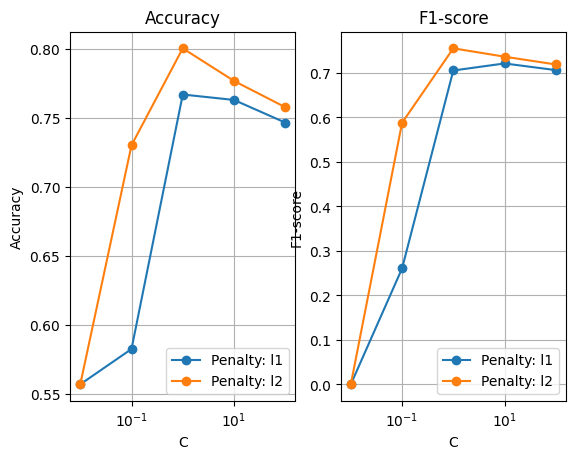

In [ ]:
plt.subplot(1, 2, 1)
for penalty in penalty_values:
    penalty_results = results_df[results_df['Penalty'] == penalty]
    plt.plot(penalty_results['C'], penalty_results['Accuracy'], marker='o', label=f'Penalty: {penalty}')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for penalty in penalty_values:
    penalty_results = results_df[results_df['Penalty'] == penalty]
    plt.plot(penalty_results['C'], penalty_results['F1-score'], marker='o', label = f'Penalty: {penalty}')
plt.xlabel('C')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.show()


## 5. SVM

In [ ]:
C_values = [0.1, 1, 10, 100]
kernel_values = ['linear', 'rbf', 'poly']

hyperparam_values = []
accuracy_scores = []
f1_scores = []

for C in C_values:
    for kernel in kernel_values:
        svm_model = SVC(C = C, kernel = kernel, random_state = 441)
        svm_model.fit(X_train, y_train)
        
        y_pred = svm_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        hyperparam_values.append((C, kernel))
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

results_df = pd.DataFrame({
    'C': [param[0] for param in hyperparam_values],
    'Kernel': [param[1] for param in hyperparam_values],
    'Accuracy': accuracy_scores,
    'F1-score': f1_scores
})

print(results_df)

        C  Kernel  Accuracy  F1-score
0     0.1  linear  0.722259  0.561658
1     0.1     rbf  0.599475  0.177898
2     0.1    poly  0.587656  0.130194
3     1.0  linear  0.791858  0.749010
4     1.0     rbf  0.803020  0.748744
5     1.0    poly  0.717663  0.557613
6    10.0  linear  0.746553  0.706687
7    10.0     rbf  0.793828  0.747994
8    10.0    poly  0.727511  0.587885
9   100.0  linear  0.735391  0.693069
10  100.0     rbf  0.791858  0.744972
11  100.0    poly  0.711753  0.546956


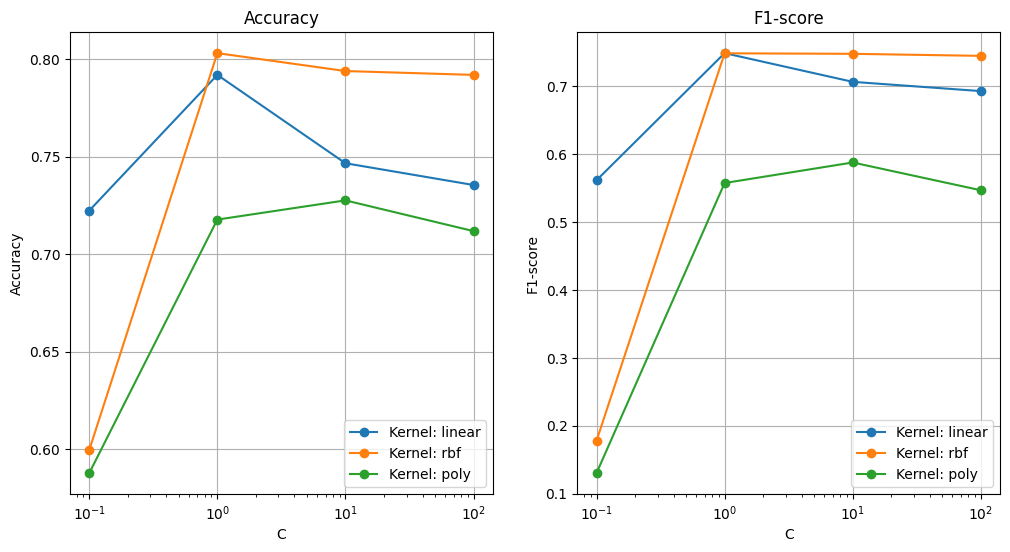

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for kernel in kernel_values:
    kernel_results = results_df[results_df['Kernel'] == kernel]
    plt.plot(kernel_results['C'], kernel_results['Accuracy'], marker='o', label=f'Kernel: {kernel}')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for kernel in kernel_values:
    kernel_results = results_df[results_df['Kernel'] == kernel]
    plt.plot(kernel_results['C'], kernel_results['F1-score'], marker='o', label=f'Kernel: {kernel}')
plt.xlabel('C')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xscale('log')
plt.legend()
plt.grid(True)

plt.show()

# 6. Test

In [65]:
train_df = pd.read_csv("train.csv")
train_df["clean_text"] = train_df["text"].apply(preprocess_text)
X_train = tfidf_vectorizer.transform(train_df["clean_text"])
y_train = train_df["target"]

test_df = pd.read_csv("test.csv")
test_df["clean_text"] = test_df["text"].apply(preprocess_text)
X_test = tfidf_vectorizer.transform(test_df["clean_text"])

svm_model = SVC(C = 1.0, kernel = 'linear', random_state = 441)
svm_model.fit(X_train, y_train)
y_test = svm_model.predict(X_test)

output = pd.DataFrame({'id': test_df['id']})
output['target'] = y_test

In [68]:
print(output)
output.to_csv("result.csv", index = False)

         id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       1
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       0

[3263 rows x 2 columns]
